In [472]:
import torch.cuda
%load_ext autoreload 
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [473]:
from test_env.callbacks import run_cbs, Callback, CountingCallback
from test_env.learner import Learner, LearnerSimple
from pathlib import Path

In [474]:
cbs = [CountingCallback()]
run_cbs(cbs, 'before_fit')
run_cbs(cbs, 'after_batch')
run_cbs(cbs, 'after_fit')

Done 1 batches


In [475]:
from models.Models import  RNN, CNN
from pathlib import Path
from test_env.dataloader import DLoader
import torch.nn.functional as F
import torch 
from torch.nn.init import normal_
from functools import partial   

dls = DLoader('MNIST')

model = RNN('kaiming')
# model = CNN()

learner = LearnerSimple(
    dls=dls,
    model = model,    
    loss_func=F.nll_loss,
    lr=0.2 
)

Layer: BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) initialized normal


In [476]:
model.to(torch.device('cpu:0'))

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_1): Dropout(p=0.25, inplace=False)
  (dropout_2): Dropout(p=0.5, inplace=False)
  (fc_1): Linear(in_features=64, out_features=32, bias=True)
  (fc_2): Linear(in_features=32, out_features=10, bias=True)
  (layers): Sequential(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [477]:
torch.cuda.is_available()

False

In [478]:
for x, y in enumerate(dls.train):
    print(y[0].size())
    b = y[0].to('cpu:0')
    break

torch.Size([64, 1, 28, 28])


In [479]:
import matplotlib.pyplot as plt 

b = b.reshape(-1, 28, 28)
img = b[63]
# plt.imshow(b[63], cmap='gray')
b.shape

torch.Size([64, 28, 28])

In [480]:
learner.fit(1)

0 True 0.4515208333333333 0.8495333333333334
0 False 0.41812416294642857 0.8615142857142857


In [481]:
learner.activations.iloc[:,2]

0      -0.001342
1      -0.000413
2      -0.005505
3      -0.002371
4       0.000186
          ...   
2363   -0.007193
2364    0.000943
2365   -0.001377
2366   -0.004244
2367   -0.001470
Name: Values, Length: 2368, dtype: float32

In [482]:
df = learner.get_normalized_activations()
df

,Layer,Epoch,Values,normalized
0,Full_2,2,-0.001342,-0.086317
1,Full_2,2,-0.000413,-0.032723
2,Full_2,2,-0.005505,-0.326229
3,Full_2,2,-0.002371,-0.145611
4,Full_2,2,0.000186,0.001767
...,...,...,...,...
2363,Full_1,2,-0.007193,-0.423493
2364,Full_1,2,0.000943,0.045412
2365,Full_1,2,-0.001377,-0.088311
2366,Full_1,2,-0.004244,-0.253556


In [483]:
df[df['Layer'] == 'Full_1'].loc[:, ['Epoch', 'normalized']]

,Epoch,normalized
320,2,0.057858
321,2,-0.079193
322,2,1.354316
323,2,-0.509148
324,2,0.599868
...,...,...
2363,2,-0.423493
2364,2,0.045412
2365,2,-0.088311
2366,2,-0.253556


<Axes: ylabel='Count'>

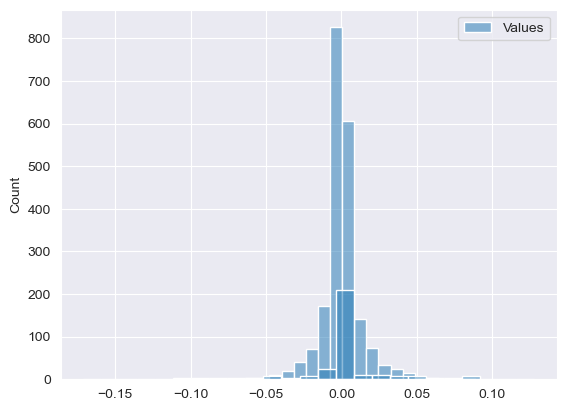

In [484]:
import seaborn as sns  

sns.histplot(df[df['Layer'] == 'Full_1'].loc[:, ['Values']], bins=25)
sns.histplot(df[df['Layer'] == 'Full_2'].loc[:, ['Values']], bins=25)

C:\Users\sonne\anaconda3\envs\seminar\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sonne\anaconda3\envs\seminar\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


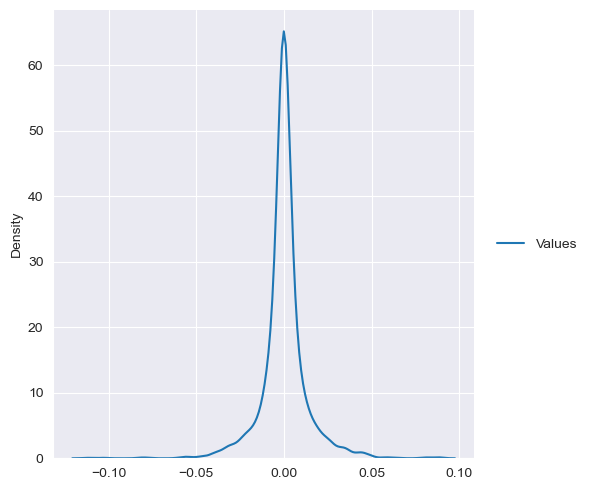

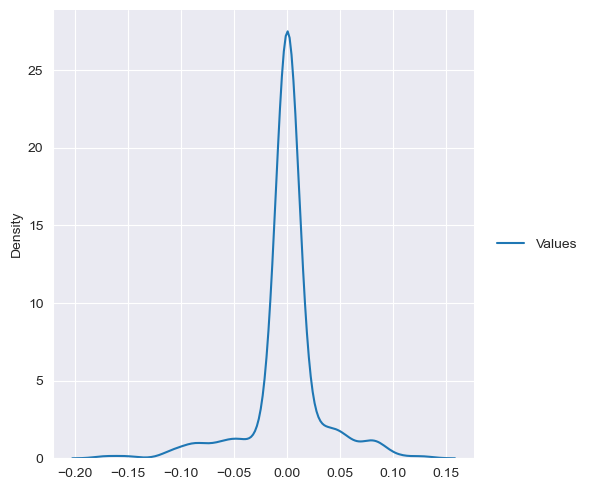

In [491]:
sns.displot(df[df['Layer'] == 'Full_1'].loc[:, ['Values']], kind='kde')
sns.displot(df[df['Layer'] == 'Full_2'].loc[:, ['Values']], kind='kde')